In [171]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [172]:
import numpy as np
import pandas as pd
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey

In [173]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [174]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [175]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [176]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [130]:
engine.execute('SELECT * FROM measurement LIMIT 30').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


In [135]:
#Earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [142]:
#Latest Date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date

'2017-08-23'

In [143]:
# And now let's get last 12 months' worth of data:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


# Query to retrieve last year's rainfall data:

In [144]:
rain = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

In [145]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


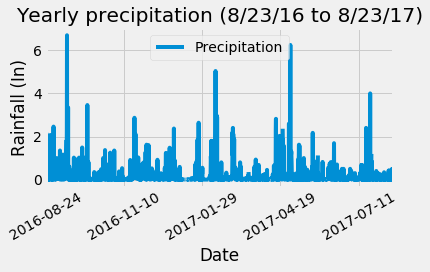

In [148]:
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rainfall (In)")
plt.title("Yearly precipitation (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [149]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print("The data shows # {} stations.".format(locations))

The data shows # 9 stations.


In [150]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

print("These are the most active stations in the datasets, along with their observations in descending order:")
for station, count in active_stations:
    print("Station #",station,"shows",count, "observations.")

These are the most active stations in the datasets, along with their observations in descending order:
Station # USC00519281 shows 2772 observations.
Station # USC00519397 shows 2724 observations.
Station # USC00513117 shows 2709 observations.
Station # USC00519523 shows 2669 observations.
Station # USC00516128 shows 2612 observations.
Station # USC00514830 shows 2202 observations.
Station # USC00511918 shows 1979 observations.
Station # USC00517948 shows 1372 observations.
Station # USC00518838 shows 511 observations.


# Temperature by "Most active station"

In [151]:
# Choose the station with the highest number of temperature observations.
most_active = active_stations[0][0]    
print("The station with the most observations is #",most_active,", showing",active_stations[0][1],"weather observations.")
print()

The station with the most observations is # USC00519281 , showing 2772 weather observations.



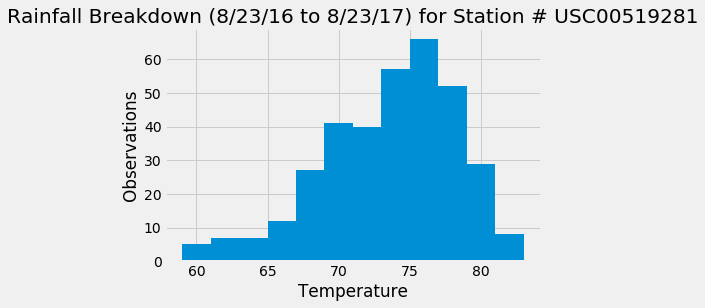

In [152]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title("Rainfall Breakdown (8/23/16 to 8/23/17) for Station # " + most_active)
plt.show()

In [161]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """MIN TEMP, AVG TEMP, and MAX TEMP for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        MIN TEMP, AVG TEMP, and MAX TEMP
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

temp_range = (calc_temps('2016-08-23', '2017-08-23'))
print(temp_range)

[(58.0, 74.59058295964125, 87.0)]


In [162]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """MIN TEMP, AVG TEMP, and MAX TEMP for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        MIN TEMP, AVG TEMP, and MAX TEMP
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

#I am using dates from 2016, supposing that I would have traveled between the same dates in 2018. 

temp_range = (calc_temps('2016-09-20', '2016-09-30'))
print(temp_range)


[(70.0, 77.94520547945206, 83.0)]


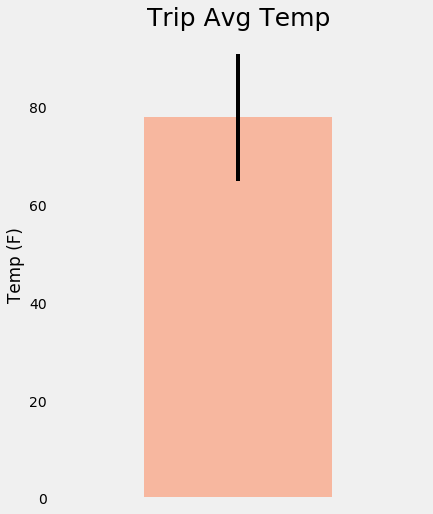

In [159]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df = pd.DataFrame(temp_range, columns=['MIN TEMP', 'AVG TEMP', 'MAX TEMP'])
avg_temp = trip_df['AVG TEMP']
min_max_temp = trip_df.iloc[0]['MAX TEMP'] - trip_df.iloc[0]['MIN TEMP']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=25)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("Temperature4Trip.png")
plt.show()


In [170]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

## Optional Challenge Assignment

In [169]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

In [166]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [167]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [168]:
# Plot the daily normals as an area plot with `stacked=False`
